In [19]:
import pandas as pd
import numpy as np
from sklearn import metrics
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import math
from pprint import pprint
from time import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix

In [20]:
def get_histogram_per_all_classes(data):
    categories = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize=(10, 5))

    # creating the bar plot
    plt.bar(categories, values, color='lightblue',
            width=0.4)

    plt.xlabel("Title's Category")
    plt.ylabel("Number of titles")
    plt.title("Number of titles - 1fin 2ent")
    plt.show()

In [21]:
def is_hebrew(text):
    print(text)
    if isinstance(text, float) and math.isnan(text):
        return True

    is_heb = any("\u0590" <= c <= "\u05EA" for c in text)
    return is_heb

In [25]:
def is_irrelevant(text):
    black_list_strings = ["Trending Now", 'Weather', 'Ad']
    return text in black_list_strings

In [26]:
parameters = {
    "vect__max_df": (0.5, 0.75, 1.0),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    "clf__max_iter": (20,),
    "clf__penalty": ("l2", "elasticnet"),
}


nan
nan
S&P Futures
3,778.75
-42.50(-1.11%)
Dow Futures
30,682.00
-317.00(-1.02%)
Nasdaq Futures
11,552.00
-139.00(-1.19%)
Russell 2000 Futures
1,697.70
-23.70(-1.38%)
Crude Oil
108.68
-1.10(-1.00%)
nan
Futures fall, S&P 500 heads for worst first half in 52 years
Strategist: Recession 'barely beginning to be priced in'
The bitter battle for Spirit Airlines takes another odd turn
Global response to climate will 'change the world over the next 75 years': Costis Maglaras
Influencers with Andy Serwer: Costis Maglaras
Why this round of tech layoffs feels different
Bed Bath & Beyond is 'in the end days,' analyst says
Big Food shakeup ‘already underway’ amid Kellogg's split
Tech stocks are having their worst year ever. Here's what history says happens next: Morning Brief
The Most Expensive Divorce Settlements of All-Time
60-Year Wall Street Veteran Says S&P 500 Will Sink to 3,100
Chip Stocks Are in for Trouble, Analyst Says. 4 Stocks Get Downgrades.
Here’s how much your Social Security check 

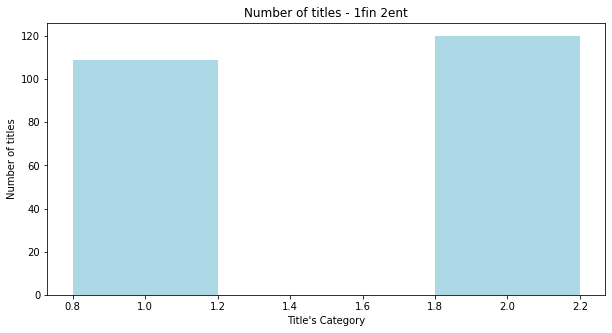

X_train: 183
X_test: 46
Performing grid search...
parameters:
{'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
done in 3.537s

	clf__max_iter: 20
	clf__penalty: 'l2'
	vect__max_df: 0.5
	vect__ngram_range: (1, 1)
For Sentence:  Elizabeth Olsen Confirms She and Robbie Arnett 'Eloped' and 'Had a Wedding at Another Time' prediction was:  Entertainment
For Sentence:  Hilarie Burton shares story of abortion after pregnancy loss: 'I only have my daughter because of my abortion' prediction was:  Entertainment
For Sentence:  AT&T Makes BofA List of Potential Reshoring Beneficiaries prediction was:  Entertainment
For Sentence:  2 “Strong Buy” Dividend Stocks With at Least 7% Dividend Yield prediction was:  Finance
For Sentence:  'Have you ever killed a man?' Kid reporters shock 'Minions' star Steve Carell with questions testing his evilness predic

C:\Users\97252\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.80855856 0.7975976  0.80855856 0.7975976  0.80855856 0.7975976
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


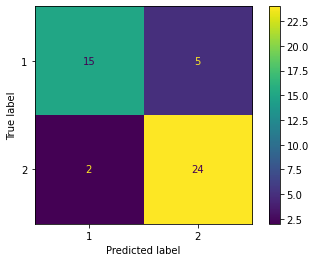

The Precision: 0.8823529411764706
The Recall: 0.75
tgbfg


In [27]:
if __name__ == '__main__':

    mapping_result = {
        1: "Finance",
        2: "Entertainment"
    }

    df_finance = pd.read_csv(
        'yahoo_data_selenium_finance.csv',
        #delimiter='\t',
        index_col=['text'])
    #print (df_finance)

    labels_finance = [1] * df_finance.shape[0]
    df_finance['label'] = labels_finance

    df_entertainment = pd.read_csv(
        'yahoo_data_selenium_ent.csv',
        #delimiter='\t',
        index_col=['text'])

    labels_entertainment = [2] * df_entertainment.shape[0]
    df_entertainment['label'] = labels_entertainment

    df_all = pd.concat([df_finance, df_entertainment])
    df_all.reset_index(inplace=True)
    df_all = df_all.loc[:, ['text', 'label']]
    # df = pd.read_csv('../yahoo_scraper/yahoo_data.csv')

    df_all['is_hebrew'] = df_all['text'].apply(lambda x: is_hebrew(x))
    df_all['is_ads'] = df_all['text'].apply(lambda x: is_irrelevant(x))
    df_all = df_all.loc[df_all.is_hebrew == False]
    df_all = df_all.loc[df_all.is_ads == False]
    df_all.to_csv('yahoo_data_2_categories_clean.csv', index=False)
    my_hist = dict(df_all['label'].value_counts())
    print(my_hist)

    parser = English()

    print(f"Dataframe holds {df_all.shape[0]} rows.")
    get_histogram_per_all_classes(my_hist)
    # label_encoder = LabelEncoder()
    # df_all['label'] = label_encoder.fit_transform(df_all['label'])

    df_all = df_all.sample(frac=1.0)
    df_all.reset_index(inplace=True)
    df_all = df_all.loc[:, ['text', 'label']]

    X = df_all['text']
    y = df_all['label']

    # spliting our data into train set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    print(f"X_train: {X_train.shape[0]}")
    print(f"X_test: {X_test.shape[0]}")

    # tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer)
    # classifier = svm.SVC(kernel='linear')

    pipe = Pipeline(
        [
            ('vect', CountVectorizer()),
            ("tfidf", TfidfTransformer()),
            ('clf', LogisticRegression()),
        ]
    )

    # print("pipeline:", [name for name, _ in pipe.steps])

    grid_search = GridSearchCV(pipe, parameters, n_jobs=-1, verbose=1)

    # pipe.fit_transform(X=X_train, y=y_train)
    # predictions = pipe.predict(X_test)
    #
    # accuracy_model_score = accuracy_score(y_true=y_test,
    #                                       y_pred=predictions)

    print("Performing grid search...")
    # print("pipeline:", [name for name, _ in pipe.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()

    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

    # X_test = data_test_sentences
    predictions = grid_search.predict(X_test)
    for sentence, predict in zip(X_test, predictions):
        print("For Sentence: ", sentence, "prediction was: ", mapping_result[predict])

    print("grid_search.predict(Which is the fastest bike?): ", grid_search.predict(['Which is the fastest bike?']))

    print("The accuracy of model on test set is:", accuracy_score(y_true=y_test,
                                                                  y_pred=predictions))

    plot_confusion_matrix(grid_search.best_estimator_, X_test, y_test)
    plt.show()
    print("The Precision:", precision_score(y_true=y_test, y_pred=predictions))
    print("The Recall:", recall_score(y_true=y_test, y_pred=predictions))

    print("tgbfg")